In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import math
warnings.filterwarnings('ignore')

In [124]:
def pixel_to_node(pixel_tuple):
    x_idx = pixel_tuple[0]
    y_idx = pixel_tuple[1]
    
    node_x = convert_number_range(x_idx, 0, 480, 0, 139)
    node_y = convert_number_range(y_idx, 0, 480, 0, 139)
    
    node = (140*int(node_x)) + int(node_y)
    
    return str(node)

In [125]:
def convert_number_range(OldValue, OldMin, OldMax, NewMin, NewMax):
    # function to account for origin (0 - 600cm => -300cm to 300 cm)

    OldRange = (OldMax - OldMin)  
    NewRange = (NewMax - NewMin)  
    NewValue = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin

    return NewValue

In [126]:
def get_index(node):
    # gets the index of a specified node (eg. row and column)
    # accepts node in float(), returns float()
    row = node // dot_size
    column = node % dot_size
    return row, column

In [127]:
def node_to_pixel(node):
    x, y = get_index(int(node))
    
    x_pixel = convert_number_range(x, 0, 139, 0, 480)
    y_pixel = convert_number_range(y, 0, 139, 0, 480) 
    pixels = (x_pixel, y_pixel
             )
    return pixels

In [128]:
# print(nx.shortest_path(G, source="0", target="5690"))

In [129]:
G = nx.drawing.nx_agraph.read_dot("mc202_trav_graph_8.dot")

In [130]:
number_of_nodes = 140 * 140

In [131]:
from IPython.display import display, clear_output

In [132]:
def get_neighbor_list(node):
    # create a list of all neighbors around the specified node
    neighbor_list = G.neighbors(str(node))
    neighbor_list = list(map(int, neighbor_list))
    neighbor_list = sorted(neighbor_list)
    return neighbor_list

In [133]:
for node in range(number_of_nodes):
    neighbor_list = get_neighbor_list(str(node))
    for neighbor in neighbor_list:
        G[str(node)][str(neighbor)]['weight'] = float(G[str(node)][str(neighbor)]['weight'])
    clear_output(wait=True)
    display('node: ' + str(node))

'node: 19525'

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [204]:
start = (297, 116)
goal = (150, 395)

In [205]:
dot_size = 140

In [206]:
source = pixel_to_node(start)
target = pixel_to_node(goal)

In [207]:
def dist(a, b):
    
    start_x, start_y = get_index(int(a))
    goal_x, goal_y = get_index(int(b))
 
    return ((start_x - goal_x) ** 2 + (start_y - goal_y) ** 2) ** 0.5

In [208]:
# %%time

# # path = nx.shortest_path(G, source, target)
# path = nx.dijkstra_path(G,source,target)
# # path = nx.astar_path(G,source,target, dist)

In [209]:
%%time

path = nx.astar_path(G, source, target, dist)

CPU times: user 900 µs, sys: 110 µs, total: 1.01 ms
Wall time: 1.01 ms


In [210]:
pixel_list = []
for node in path:
    pixels = node_to_pixel(node)
    pixel_list.append(pixels)

In [211]:
# pixel_list

In [212]:
x_list = []
y_list = []
for pixel_tuple in pixel_list:
#     node = (pos[1]*graph_size) + pos[0]
#     pix_x, pix_y = node_to_pixel(node)
    x_list.append(pixel_tuple[0])
    y_list.append(pixel_tuple[1])

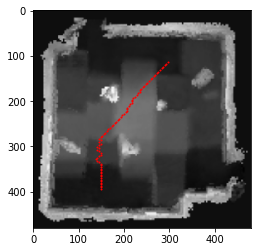

In [213]:
img = plt.imread("mc202.png")
fig, ax = plt.subplots()
ax.scatter(x_list, y_list, s = 1, color="red")
im = ax.imshow(img)